In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results & drop duplicates
mouse_metadata = pd.read_csv(mouse_metadata_path).drop_duplicates()
study_results = pd.read_csv(study_results_path).drop_duplicates()

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how ='right')

# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1887,r944,Capomulin,Male,12,25,45,41.581521,2
1888,u364,Capomulin,Male,18,17,45,31.023923,3
1889,p438,Ceftamin,Female,11,26,45,61.433892,1
1890,x773,Placebo,Female,21,30,45,58.634971,4


# Display a preview of the tables

In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Checking the number of mice.
num_mice = merged_data['Mouse ID'].unique()
mice = len(num_mice)
mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data.loc[merged_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [6]:
duplicate_mice[0]
merged_data[merged_data['Mouse ID'] ==duplicate_mice[0]].shape 

(12, 8)

In [7]:
# Optional: Get all the data for the duplicate mouse ID.
all_mouseid = merged_data.loc[merged_data.duplicated(subset=["Mouse ID"])]
all_mouseid

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
249,a275,Ceftamin,Female,20,28,5,46.795257,0
250,w575,Zoniferol,Female,16,28,5,48.913860,1
251,x822,Ceftamin,Male,3,29,5,45.671104,1
252,l509,Capomulin,Male,17,21,5,45.851193,0
253,n304,Naftisol,Male,9,26,5,46.431216,0
...,...,...,...,...,...,...,...,...
1887,r944,Capomulin,Male,12,25,45,41.581521,2
1888,u364,Capomulin,Male,18,17,45,31.023923,3
1889,p438,Ceftamin,Female,11,26,45,61.433892,1
1890,x773,Placebo,Female,21,30,45,58.634971,4


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merged_data[merged_data["Mouse ID"].isin(duplicate_mice) ==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1887,r944,Capomulin,Male,12,25,45,41.581521,2
1888,u364,Capomulin,Male,18,17,45,31.023923,3
1889,p438,Ceftamin,Female,11,26,45,61.433892,1
1890,x773,Placebo,Female,21,30,45,58.634971,4


In [9]:
 # Checking the number of mice in the clean DataFrame.
clean_mice = clean_df['Mouse ID'].value_counts()
Cmice = len(clean_mice)
Cmice

248

# Summary Statisitics

In [10]:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
tumor_regimen = clean_df.groupby(['Drug Regimen'])
tumor_regimen

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = tumor_regimen["Tumor Volume (mm3)"].mean()
tumor_median = tumor_regimen["Tumor Volume (mm3)"].median()
tumor_variance = tumor_regimen["Tumor Volume (mm3)"].var()
tumor_stddev = tumor_regimen["Tumor Volume (mm3)"].std()
tumor_SEM = tumor_regimen["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
tumor_sum = pd.DataFrame({"Mean": tumor_mean,
                         "Median": tumor_median,
                         "Variance": tumor_variance,
                         "Std Deviation": tumor_stddev,
                         "SEM": tumor_SEM})
tumor_sum


,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor_agg = tumor_regimen["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
tumor_agg.columns = ["Mean", "Median", "Variance", "Std Deviation", "SEM"]
tumor_agg

,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

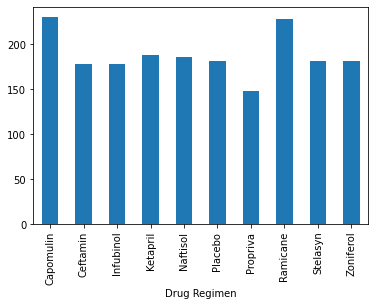

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
clean_df.groupby(['Drug Regimen'])["Timepoint"].count().plot(kind = "bar")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

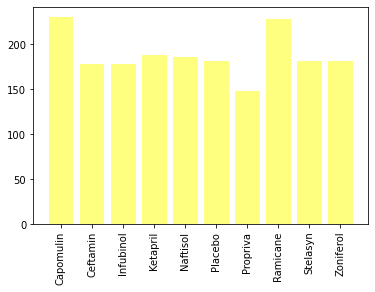

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints_pyplot = clean_df.groupby(['Drug Regimen'])["Timepoint"].count()

plt.bar(timepoints_pyplot.index, timepoints_pyplot.values, color='yellow', alpha=0.5, align="center")
plt.xticks(rotation = "vertical")

<AxesSubplot:ylabel='Mouse ID'>

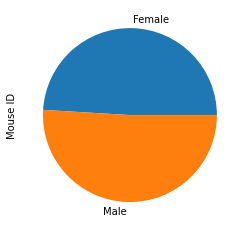

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_df.groupby(['Sex'])["Mouse ID"].count().plot(kind = "pie")

([<matplotlib.patches.Wedge at 0x206044f94f0>,
 [Text(0.03308201408261561, 1.0995024239828841, 'Female'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Male')])

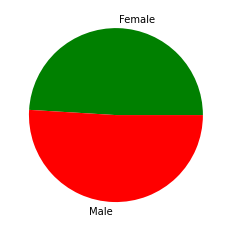

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
timepoints_pyplot = clean_df.groupby(['Sex'])["Mouse ID"].count()
plt.pie(timepoints_pyplot.values, labels=timepoints_pyplot.index, colors=["green","red"])

# Quartiles, Outliers, and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
filtered_df = clean_df[(clean_df["Drug Regimen"]=="Capomulin") |
                       (clean_df["Drug Regimen"]=="Ramicane") |
                       (clean_df["Drug Regimen"]=="Infubinol") |
                       (clean_df["Drug Regimen"]=="Ceftamin")]

final_tumor_vol = filtered_df.groupby(["Mouse ID"])
final_tumor_vol["Timepoint"].max()

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_vol_df = final_tumor_vol["Timepoint"].max().to_frame()
final_tumor_vol_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

final_tumor_vol_df = final_tumor_vol_df.merge(filtered_df, right_on= "Mouse ID", left_on="Mouse ID", suffixes= ("_max",None))
final_tumor_vol_df

final_tumor_vol_df[final_tumor_vol_df["Timepoint_max"]==final_tumor_vol_df["Timepoint"]]

,Mouse ID,Timepoint_max,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,a203,45,Infubinol,Female,20,23,45,67.973419,2
19,a251,45,Infubinol,Female,21,25,45,65.525743,1
29,a275,45,Ceftamin,Female,20,28,45,62.999356,3
39,a411,45,Ramicane,Male,3,22,45,38.407618,1
49,a444,45,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...,...
773,y769,45,Ceftamin,Female,6,27,45,68.594745,4
783,y793,45,Capomulin,Male,17,17,45,31.896238,2
793,y865,45,Ceftamin,Male,23,26,45,64.729837,3
803,z578,45,Ramicane,Male,11,16,45,30.638696,0


In [17]:
# Put treatments into a list for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bound

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Line and Scatter Plots

In [19]:
clean_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [20]:
clean_df['Tumor Volume (mm3)']

0       45.000000
1       45.000000
2       45.000000
3       45.000000
4       45.000000
          ...    
1887    41.581521
1888    31.023923
1889    61.433892
1890    58.634971
1891    72.555239
Name: Tumor Volume (mm3), Length: 1880, dtype: float64

In [21]:
clean_df['Timepoint']

0        0
1        0
2        0
3        0
4        0
        ..
1887    45
1888    45
1889    45
1890    45
1891    45
Name: Timepoint, Length: 1880, dtype: int64

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
471,b128,Capomulin,Female,9,22,5,45.651331,0
678,b128,Capomulin,Female,9,22,10,43.270852,0
718,b128,Capomulin,Female,9,22,15,43.784893,0
932,b128,Capomulin,Female,9,22,20,42.731552,0
1267,b128,Capomulin,Female,9,22,25,43.262145,1
1399,b128,Capomulin,Female,9,22,30,40.605335,1
1546,b128,Capomulin,Female,9,22,35,37.967644,1
1628,b128,Capomulin,Female,9,22,40,38.379726,2
1763,b128,Capomulin,Female,9,22,45,38.982878,2


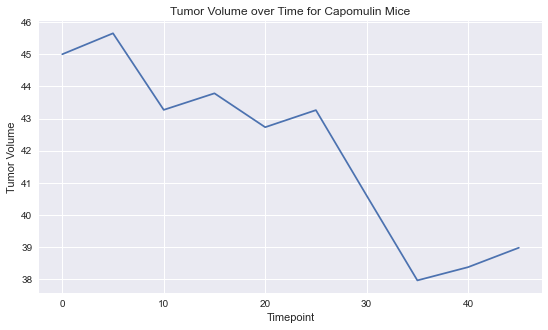

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Set a new theme
plt.style.use('seaborn')

#Single mouse treated with Capomulin 
mouse_id = clean_df[clean_df['Drug Regimen']== 'Capomulin'].iloc[0]['Mouse ID']
mouse_df = clean_df[clean_df['Mouse ID']==mouse_id]
display(mouse_df)

#Create x & y values for plotting
x_values = mouse_df['Timepoint']
y_values = mouse_df['Tumor Volume (mm3)']

# Plot the tumor volume for various mice
fig, ax = plt.subplots(figsize = (9,5))
plt.plot(x_values, y_values)


# Show the chart, add labels
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume over Time for Capomulin Mice')
plt.show()

In [23]:
clean_df['Tumor Volume (mm3)']

0       45.000000
1       45.000000
2       45.000000
3       45.000000
4       45.000000
          ...    
1887    41.581521
1888    31.023923
1889    61.433892
1890    58.634971
1891    72.555239
Name: Tumor Volume (mm3), Length: 1880, dtype: float64

In [24]:
clean_df['Weight (g)']

0       22
1       29
2       29
3       30
4       25
        ..
1887    25
1888    17
1889    26
1890    30
1891    26
Name: Weight (g), Length: 1880, dtype: int64

Text(0, 0.5, 'Average Tumor Volume (mm3)')

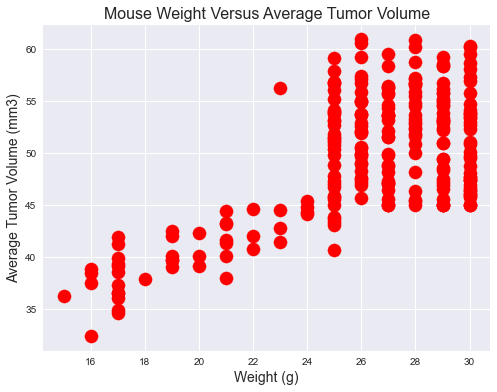

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Create a title, x label, and y label for our chart
fig1, ax1 = plt.subplots(figsize=(8, 6))
avg_capm_vol =clean_df.groupby(['Mouse ID']).mean()

marker_size=12
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'],s=175, color="red")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =16)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Average Tumor Volume (mm3)',fontsize =14)
# Save the figure




# Correlation and Regression

In [26]:
clean_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

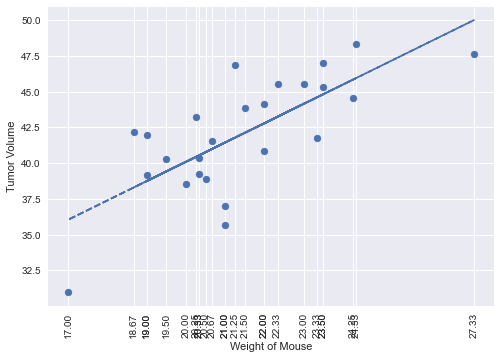

The correlation between weight and tumor value is 0.73


In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_df = clean_df[clean_df["Drug Regimen"]== 'Capomulin']

mouse_weight = final_tumor_vol_df.groupby(capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = final_tumor_vol_df.groupby(capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Perform a linear regression on year versus violent crime rate
slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_volume)
      
# Create equation of line to calculate predicted violent crime rate
fit = slope * mouse_weight + int

# Plot the linear model on top of scatter plot 
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.plot(mouse_weight,fit,"--")
plt.xticks(mouse_weight, rotation=90)
plt.show()

# Caculate correlation coefficient
corr = round(st.pearsonr(mouse_weight,tumor_volume)[0],2)
print(f'The correlation between weight and tumor value is {corr}')